How does the speed of higher ranked pokemon compare to the speed of other first generation pokemons?

Again, my study will be a retrospective observation study using a census, I will examine the whole population.

This data set was gathered by fans I assume, the origins of the data is from the first generation of pokemon (pokemon game data), detaling all of their stats and categories. A bias that could be created is human error when entering the data for the csv. 

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


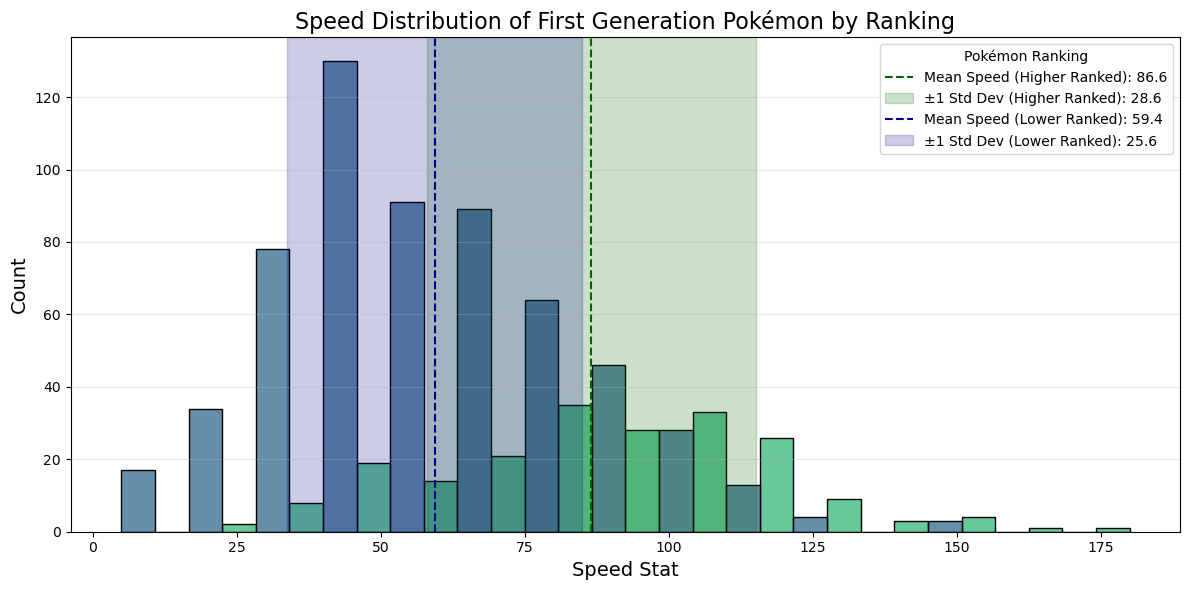

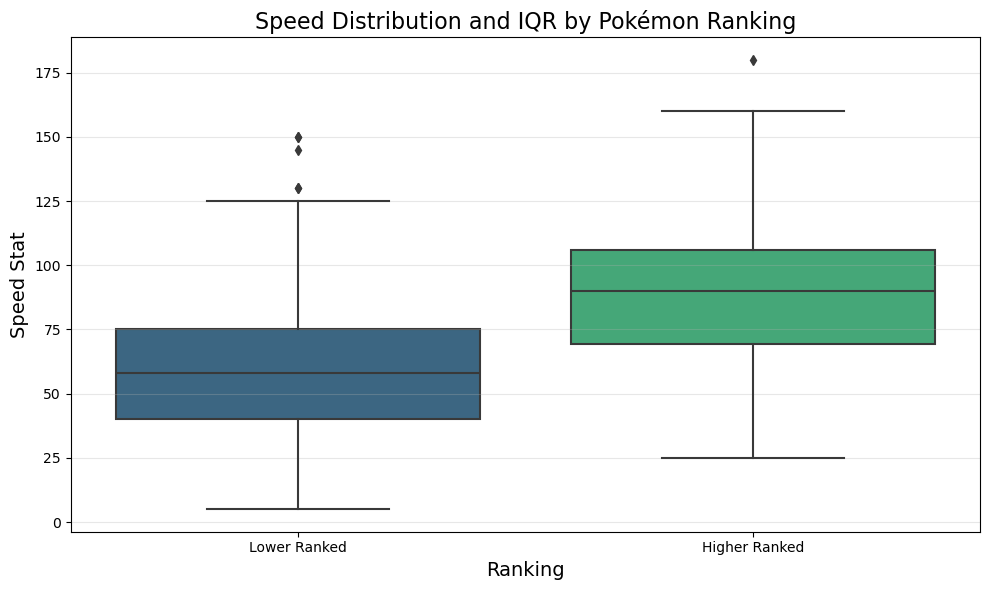

Speed Statistics by Ranking:

                    Mean  Median    Std_Dev    IQR    Q1      Q3
Rank                                                            
Higher Ranked  86.573529    90.0  28.568809  36.25  69.5  105.75
Lower Ranked   59.418760    58.0  25.604219  35.00  40.0   75.00

Detailed Statistical Analysis:

Higher Ranked Pokémon:
  - Mean Speed: 86.57
  - Median Speed: 90.00
  - Standard Deviation: 28.57
  - Interquartile Range: 36.25
  - Range: 155.00 (Min: 25, Max: 180)
  - Coefficient of Variation: 33.00%

Lower Ranked Pokémon:
  - Mean Speed: 59.42
  - Median Speed: 58.00
  - Standard Deviation: 25.60
  - Interquartile Range: 35.00
  - Range: 145.00 (Min: 5, Max: 150)
  - Coefficient of Variation: 43.09%

Statistical Comparison:
- Mean Speed Difference: 27.15
- Standard Deviation Comparison: Higher Ranked (28.57) vs Lower Ranked (25.60)
- IQR Comparison: Higher Ranked (36.25) vs Lower Ranked (35.00)

Answer: Higher ranked Pokémon are generally faster (mean speed = 86.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def analyze_pokemon_speed(gen1_pokemon):
    # --- Step 1: Compute Total Stats ---
    stat_columns = [col for col in gen1_pokemon.columns if col.lower() in 
                   ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]
    if stat_columns:
        gen1_pokemon['Total'] = gen1_pokemon[stat_columns].sum(axis=1)
    else:
        print("Warning: Cannot find or calculate 'Total' stats.")
        return  

    # --- Step 2: Top 25% threshold ---
    threshold = gen1_pokemon['Total'].quantile(0.75)

    # --- Step 3: Categorize Pokémon ---
    gen1_pokemon['Rank'] = gen1_pokemon['Total'].apply(
        lambda x: 'Higher Ranked' if x >= threshold else 'Lower Ranked'
    )

    # --- Step 4: Ensure speed column exists ---
    speed_col = 'Speed' if 'Speed' in gen1_pokemon.columns else 'speed' if 'speed' in gen1_pokemon.columns else None
    if not speed_col:
        print("Error: Cannot find Speed column in the dataset.")
        return  

    # --- Step 5: Histogram with Standard Deviation ---
    plt.figure(figsize=(12, 6))
    sns.histplot(data=gen1_pokemon, x=speed_col, hue='Rank',
                 multiple='dodge', bins=15, palette='viridis')

    plt.title('Speed Distribution of First Generation Pokémon by Ranking', fontsize=16)
    plt.xlabel('Speed Stat', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y', alpha=0.3)

    # Vertical mean lines and standard deviation ranges
    for rank, color in zip(['Higher Ranked', 'Lower Ranked'], ['darkgreen', 'darkblue']):
        rank_data = gen1_pokemon[gen1_pokemon['Rank'] == rank][speed_col]
        avg_speed = rank_data.mean()
        std_dev = rank_data.std()
        
        # Mean line
        plt.axvline(x=avg_speed, color=color, linestyle='--', 
                    label=f'Mean Speed ({rank}): {avg_speed:.1f}')
        
        # Standard deviation range (shaded area)
        plt.axvspan(avg_speed - std_dev, avg_speed + std_dev, alpha=0.2, color=color,
                   label=f'±1 Std Dev ({rank}): {std_dev:.1f}')

    plt.legend(title='Pokémon Ranking')
    plt.tight_layout()
    plt.show()

    # --- Step 6: Box Plot for IQR Visualization ---
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=gen1_pokemon, x='Rank', y=speed_col, palette='viridis')
    plt.title('Speed Distribution and IQR by Pokémon Ranking', fontsize=16)
    plt.xlabel('Ranking', fontsize=14)
    plt.ylabel('Speed Stat', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Step 7: Summary Statistics ---
    stats = gen1_pokemon.groupby('Rank')[speed_col].agg(
        Mean='mean',
        Median='median',
        Std_Dev='std',
        IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75)
    )
    print("Speed Statistics by Ranking:\n")
    print(stats)
    
    # Calculate and print additional statistical information
    print("\nDetailed Statistical Analysis:")
    for rank in ['Higher Ranked', 'Lower Ranked']:
        rank_data = gen1_pokemon[gen1_pokemon['Rank'] == rank][speed_col]
        print(f"\n{rank} Pokémon:")
        print(f"  - Mean Speed: {rank_data.mean():.2f}")
        print(f"  - Median Speed: {rank_data.median():.2f}")
        print(f"  - Standard Deviation: {rank_data.std():.2f}")
        print(f"  - Interquartile Range: {rank_data.quantile(0.75) - rank_data.quantile(0.25):.2f}")
        print(f"  - Range: {rank_data.max() - rank_data.min():.2f} (Min: {rank_data.min()}, Max: {rank_data.max()})")
        print(f"  - Coefficient of Variation: {(rank_data.std() / rank_data.mean() * 100):.2f}%")

    # --- Step 8: Interpretation ---
    higher_mean = stats.loc['Higher Ranked', 'Mean']
    lower_mean = stats.loc['Lower Ranked', 'Mean']
    higher_std = stats.loc['Higher Ranked', 'Std_Dev']
    lower_std = stats.loc['Lower Ranked', 'Std_Dev']
    higher_iqr = stats.loc['Higher Ranked', 'IQR']
    lower_iqr = stats.loc['Lower Ranked', 'IQR']

    print("\nStatistical Comparison:")
    print(f"- Mean Speed Difference: {abs(higher_mean - lower_mean):.2f}")
    print(f"- Standard Deviation Comparison: Higher Ranked ({higher_std:.2f}) vs Lower Ranked ({lower_std:.2f})")
    print(f"- IQR Comparison: Higher Ranked ({higher_iqr:.2f}) vs Lower Ranked ({lower_iqr:.2f})")

    if higher_mean > lower_mean:
        print(f"\nAnswer: Higher ranked Pokémon are generally faster "
              f"(mean speed = {higher_mean:.1f}, std = {higher_std:.1f}) compared to lower ranked ones "
              f"(mean speed = {lower_mean:.1f}, std = {lower_std:.1f}).")
    else:
        print(f"\nAnswer: Lower ranked Pokémon are generally faster "
              f"(mean speed = {lower_mean:.1f}, std = {lower_std:.1f}) compared to higher ranked ones "
              f"(mean speed = {higher_mean:.1f}, std = {higher_std:.1f}).")


# --- Load dataset & run function ---
gen1_pokemon = pd.read_csv("pokemon - all.csv")

# If the dataset contains all gens, keep only Gen 1
if "Generation" in gen1_pokemon.columns:
    gen1_pokemon = gen1_pokemon[gen1_pokemon["Generation"] == 1]

# Run analysis
analyze_pokemon_speed(gen1_pokemon)

This shows that the mean speed of higher ranked pokemon is 86.6 compared to the mean speed of lower ranked pokemon (59.4), this could be due to there being a lot more lower ranked pokemon than higher ranked.